In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [25]:
#reading the transformed crime data
file_path = r'..\data\transformed_crime_data.csv'
sheet_name = 'Table 04'

df = pd.read_csv(file_path)

In [26]:
#checking for column names and any non-null columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      1000 non-null   int64 
 1   Year ending               1000 non-null   object
 2   Demographic Category      1000 non-null   object
 3   Demographic Group         1000 non-null   object
 4   Country of Birth          1000 non-null   object
 5   Unique Alleged Offenders  1000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 47.0+ KB
None


In [29]:
print(df["Demographic Group"].value_counts())

Demographic Group
25_44                400
10_24                300
45_54                200
55 years and over    100
Name: count, dtype: int64


In [30]:
df.head(5)

,Year,Year ending,Demographic Category,Demographic Group,Country of Birth,Unique Alleged Offenders
0,2025,June,Age Group,10_24,Afghanistan,58
1,2025,June,Age Group,10_24,Australia,4840
2,2025,June,Age Group,10_24,China,17
3,2025,June,Age Group,10_24,India,14
4,2025,June,Age Group,10_24,Iran,20


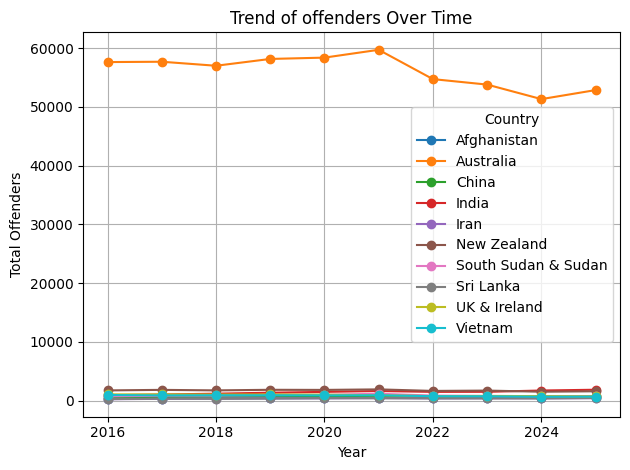

In [35]:
df_grouped = df.groupby(['Year','Country of Birth'])['Unique Alleged Offenders'].sum().reset_index()
df_pivot = df_grouped.pivot(index='Year', columns='Country of Birth', values='Unique Alleged Offenders').fillna(0)

plt.Figure(figsize=(10,5))
for country in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[country], marker='o', linestyle='-', label=country)



plt.title('Trend of offenders Over Time')
plt.xlabel('Year')
plt.ylabel('Total Offenders')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

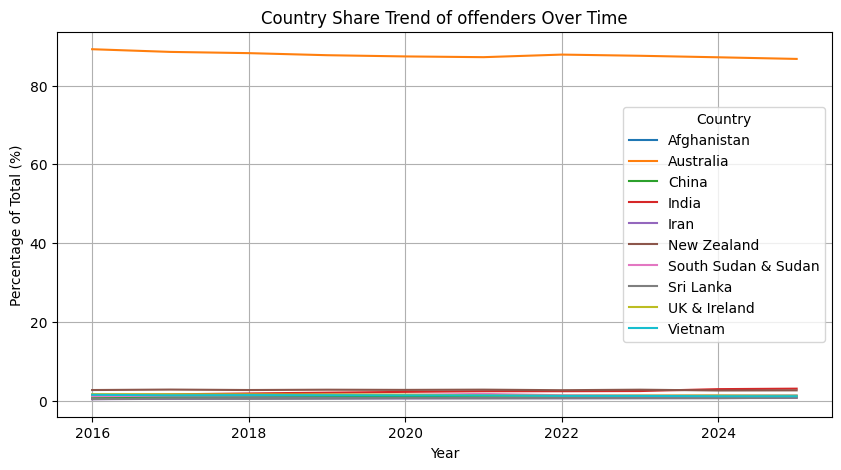

In [43]:
df_grouped = df.groupby(['Year','Country of Birth'])['Unique Alleged Offenders'].sum().reset_index()
df_grouped['Percent'] = df_grouped.groupby(['Year'])['Unique Alleged Offenders'].transform(lambda x: x / x.sum() * 100)
df_pivot = df_grouped.pivot(index='Year', columns='Country of Birth', values='Percent')


df_pivot.plot(kind='line', figsize=(10,5))

plt.title('Country Share Trend of offenders Over Time')
#plt.xlabel('Year')
plt.ylabel('Percentage of Total (%)')
plt.legend(title='Country')
plt.grid(True)

plt.show()